In [13]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def initialize(dim):
    return np.zeros([dim, 1]), 0

In [4]:
def propagate(params, X, Y):
    w = params['w']
    b = params['b']
    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))/m
    
    dz = A - Y
    dw = np.dot(X, dz.T)/m
    db = np.sum(dz, axis = 1, keepdims = True)/m
    
    assert(dw.shape == w.shape)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
            "db": db}
   
    return grads, cost
    
    

In [5]:
def optimize(params, X, Y, num_iterations, learning_rate, print_cost):
    costs = []
    for i in range(1, num_iterations + 1):
        grads, cost = propagate(params, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        params["w"] = params["w"] - (learning_rate * dw)
        params["b"] = params["b"] - (learning_rate * db)
        
        
        if i%100 == 0 and print_cost:
            print("cost at iteration ", i, ": ", cost)
            costs.append(cost)
        
    return params, grads, costs

In [6]:
def predict(w, b, X, Y):
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    Y_prediction = np.where(A<=0.5, 0, 1)
    
    acc = 100 - np.mean(np.abs(Y_prediction - Y)) * 100
    
    return acc

In [7]:
def model(train_x, train_y, test_x, test_y, num_iteration, learning_rate, print_cost):
    w, b = initialize(train_x.shape[0])
    params = {"w": w,
             "b": b}
    params, grads, costs = optimize(params, train_x, train_y, num_iteration, learning_rate, print_cost)
    
    train_acc = predict(params["w"], params["b"], train_x, train_y)
    test_acc = predict(params["w"], params["b"], test_x, test_y)
    
    print("training accuracy: ", train_acc)
    print("test accuracy: ", test_acc)
    
    data = {"params": params,
           "grads": grads,
           "costs": costs,
           "train_acc": train_acc,
           "test_acc": test_acc}
    
    return data

In [8]:
with open("handwrittendata.pickle", "rb") as pickle_in:
    data = pickle.load(pickle_in)

In [9]:
print(data.keys())
trainx = data['trainx']
trainy = data['trainy']
testx = data['testx']
testy = data['testy']

dict_keys(['trainx', 'trainy', 'testx', 'testy'])


In [10]:
testx = testx/255
trainx = trainx/255

In [11]:
permutation_train = np.random.permutation(trainx.shape[1])
permutation_test = np.random.permutation(testx.shape[1])

trainx = trainx[:, permutation_train]
trainy = trainy[:, permutation_train]
testx = testx[:, permutation_test]
testy = testy[:, permutation_test]

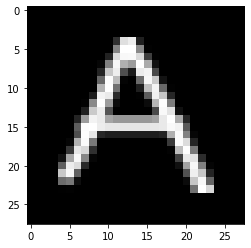

In [14]:
index = 108
img = trainx[:, index]
img = img.reshape(28, 28)
plt.imshow(img, cmap = "gray")

In [18]:
d = model(trainx, trainy, testx, testy, 4000, 0.005, True)

cost at iteration  100 :  0.4014267317402971
cost at iteration  200 :  0.3002306447961417
cost at iteration  300 :  0.24911164288319676
cost at iteration  400 :  0.21760020949079847
cost at iteration  500 :  0.19587957809645315
cost at iteration  600 :  0.17981086713103386
cost at iteration  700 :  0.16733094080244929
cost at iteration  800 :  0.15728842486310182
cost at iteration  900 :  0.14898640126758353
cost at iteration  1000 :  0.14197636079569162
cost at iteration  1100 :  0.13595547499034152
cost at iteration  1200 :  0.1307112291282901
cost at iteration  1300 :  0.12608967487001704
cost at iteration  1400 :  0.1219762840365205
cost at iteration  1500 :  0.11828390687082203
cost at iteration  1600 :  0.11494492490597348
cost at iteration  1700 :  0.11190597928502675
cost at iteration  1800 :  0.10912433454079112
cost at iteration  1900 :  0.1065653117917592
cost at iteration  2000 :  0.10420043944414009
cost at iteration  2100 :  0.10200609638552224
cost at iteration  2200 :  